# Title: Gender Disparities in Heart Disease Risk Factors and Prevalence: Exploring the Impact of Key Predictive Variables

### INTRODUCTION

Heart disease is a significant global health concern affecting both men and women. Gender differences exist in the prevalence, risk factors, and manifestations of heart disease. Understanding these gender-specific aspects is crucial for effective prevention and treatment strategies. Factors such as cholesterol levels, age, blood pressure, electrocardiographic results, maximum heart rate achieved, and sex can contribute to heart disease development. By analyzing these key predictive variables, including their relationship with different genders, we aim to identify which gender is more affected by heart disease. This research will contribute to our knowledge of gender-specific factors influencing heart disease and facilitate the development of targeted interventions for improved cardiovascular health.

In this project, our main question revolves around determining which gender is more likely to develop heart disease based on potential contributing factors, " Which gender has more chance to get heart disease by considering the features that might cause the heart disease?". To answer this question, we will analyze various variables that are known to be associated with heart disease. By examining these variables, we aim to identify any disparities between males and females in terms of their susceptibility to heart disease. We will explore the relationship between gender and these contributing factors, seeking to understand which gender exhibits a higher risk for developing heart disease. By conducting a thorough analysis, we hope to shed light on the gender-specific aspects of heart disease and contribute to a better understanding of this health issue.

To answer our question, we will consider several useful variables that impact CP. These variables include cholesterol levels, age, resting blood pressure, resting electrocardiographic results, maximum heart rate achieved, and sex (color). By examining these factors, we can gain insights into the cardiovascular performance and better understand its relationship with these variables. 

For the preliminary exploratory data analysis, we will demonstrate that the dataset can be read from the web into R. We will organize the data into a single table with multiple columns. We will also clean and wrangle the data to ensure it is in a tidy format, making visualization easy. We will then explore the dataset using summary statistics, visualizations, and statistical tests. Our aim is to identify relationships between variables and understand the distribution of the target variable. To facilitate understanding, we color-label certain variables. Additionally, we will compare age and sex with multiple variables within the dataset, utilizing various plots to demonstrate specific relationships between them.

### METHODS & RESULTS

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(gridExtra)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Methods:** 

0. `Read` the data by the `URL` and `select` the columns:

     * `age`
     * `sex`
     * `cp`
     * `trestbps`
     * `chol`
     * `restecg`
     * `thalach`


1. Find each gender’s most chest pain type by selecting `sex` and `chest pain` type `typical angina`, `atypical angina`, `non-anginal`, `asymptomatic` columns. Then we will create a `bar graph` and `color` males and females differently.

2. We are comparing each gender by cholesterol and finding which gender has a higher cholesterol rate. We are going to `select` `sex` and serum `cholesterol` columns. Then we are going to `mutate` the data and find the `average chol rate` for each `sex`. Then create the bar graph of `sex` against `average chol rate` and `color` `males` and `females` differently.

3. We are comparing each gender by resting blood pressure and finding which gender has a higher resting blood pressure rate. We are going to `select` the `sex` and `resting blood pressure(trestbps)` columns. Then we are going to `mutate` the data and find the `average resting blood pressure(trestbps) rate` for each `sex`.

4. Find each gender’s most `resting electrocardiographic results` by `selecting` `sex`, and `restecg` columns. Then we are going to create a `bar` graph and `color` `males` and `females` differently.

5. Comparing each gender by `maximum heart rate achieved` and finding which gender has `higher maximum heart rate achieved`. We are going to select `sex`, and `thalach` columns. Then we are going to `mutate` the data and find the `average thalach rate` for each `sex`. Then create the `bar` graph of `sex` against `average thalach rate` and `colour` `males` and `females` differently.


6. Finally, combine all features against gender together and see what results we get.


**Why these Variables?**

We have selected specific variables for our research because they are interrelated and provide sufficient information to address our research question. The variables we have chosen hold significant relevance in predicting heart conditions and assessing the risk of heart disease. Cholesterol levels play a crucial role as they indicate the presence of fatty deposits in blood vessels. Higher cholesterol levels are a strong indication of potential heart issues. Age is also an important variable since the risk of heart disease generally increases as individuals grow older. To ensure the accuracy of our predictions, we must consider resting blood pressure as a variable. High resting blood pressure is a major risk factor for heart disease and can help identify individuals prone to developing such conditions. Resting electrocardiographic data is another key factor in determining the risk of heart disease. Research conducted by Kaolawanich, Y., Thongsongsang, R., and Songsangjinda, T. has shown that abnormal resting electrocardiographic cardiogram readings are strong predictors of mortality and major adverse cardiac events. To enhance the reliability of our predictions, we have included the variable of maximum heart rate. Studies have demonstrated that a 10-beat per minute increase in heart rate is associated with a minimum 20% rise in the risk of cardiac death. Therefore, maximum heart rate is of utmost importance in determining gender-specific risk based on these variables.

**Results:**

In [138]:
# Method_0
heart_disease <-read_csv("https://raw.githubusercontent.com/raulortiz04/dsci-100-2023s1-group-59/main/heart_disease_uci.csv")

heart_disease <- heart_disease |>
    select(-num, -thal, -slope, -id, -dataset, -oldpeak, -exang, -ca, -fbs) |> # remove columns that is not important
    na.omit() # remove NAs
heart_disease

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,restecg,thalch
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
63,Male,typical angina,145,233,lv hypertrophy,150
67,Male,asymptomatic,160,286,lv hypertrophy,108
67,Male,asymptomatic,120,229,lv hypertrophy,129
37,Male,non-anginal,130,250,normal,187
⋮,⋮,⋮,⋮,⋮,⋮,⋮
46,Male,asymptomatic,134,310,normal,126
54,Female,asymptomatic,127,333,st-t abnormality,154
55,Male,asymptomatic,122,223,st-t abnormality,100
62,Male,atypical angina,120,254,lv hypertrophy,93


`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


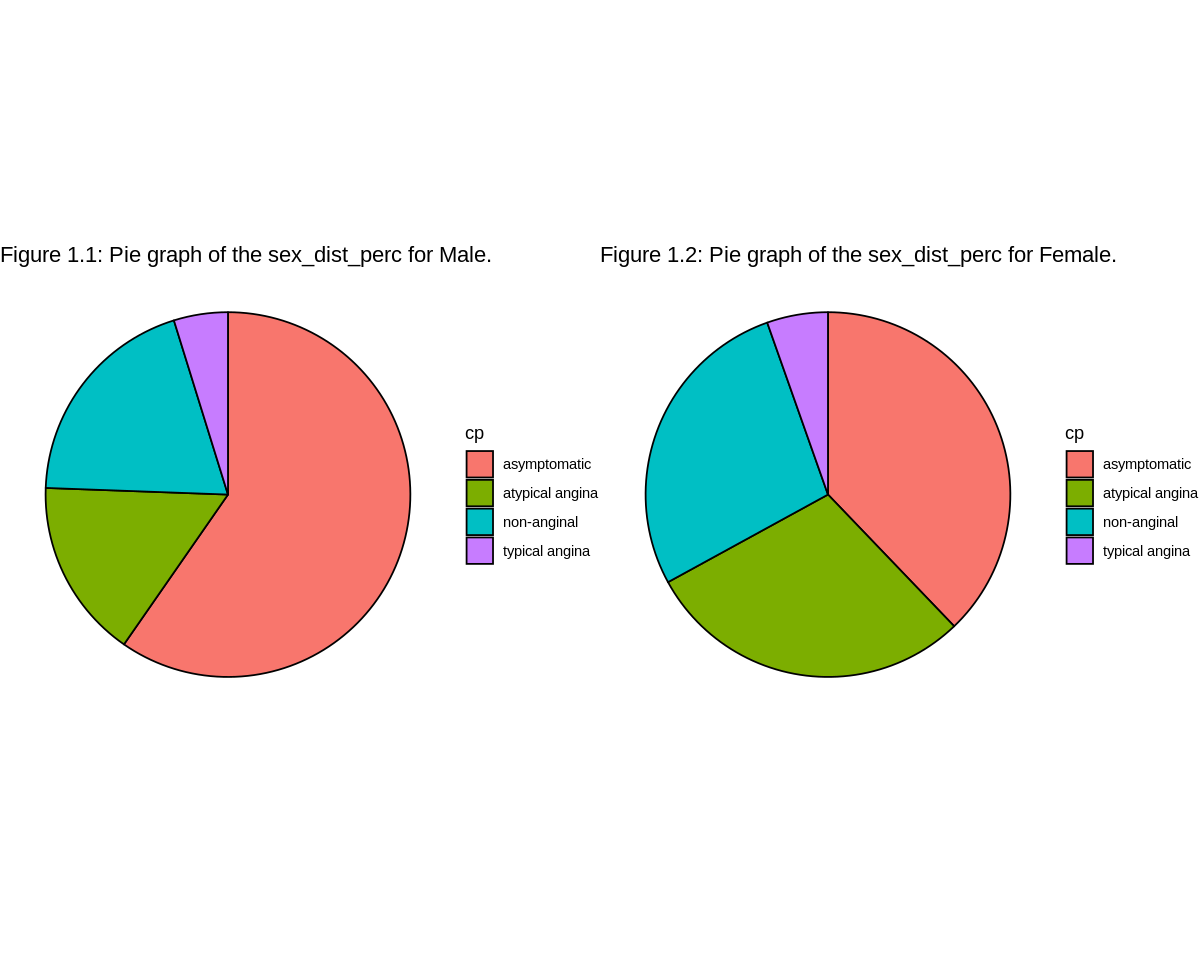

In [167]:
# Method_1

# Number of Female & Male
sex_dist <- heart_disease |>
  group_by(sex, cp) |>
  summarize(count = n())

# Percentate of Female & Male
sex_dist_perc <- sex_dist |>
  mutate(percent = count / sum(count) * 100)

# Pie plot of the sex_dist_perc for male
male_dist_plot <- sex_dist_perc |>
    filter(sex == "Male") |>
    ggplot(aes(x = "", y = -percent, fill = cp)) + 
    geom_bar(stat = "identity", color = "black") +
    ggtitle("Figure 1.1: Pie graph of the sex_dist_perc for Male.") +
    coord_polar("y") +
    theme_void()

# Plot of the sex_dist_perc for female
female_dist_plot <- sex_dist_perc |>
    filter(sex == "Female") |>
    ggplot(aes(x = "", y = -percent, fill = cp)) + 
    geom_bar(stat = "identity", color = "black") +
    ggtitle("Figure 1.2: Pie graph of the sex_dist_perc for Female.") +
    coord_polar("y") +
    theme_void()

# Pie Plot of the sex_dist_perc for both gender
grid.arrange(male_dist_plot, female_dist_plot, ncol = 2)

`Figure 1.1` and `Figure 1.2` illustrate different types of chest pain (asymptomatic, atypical angina, non-anginal, typical angina ) among males and females. They reveal that asymptomatic chest pain is more prevalent in both males and females as indicated by the larger slice of pie chart. Furthermore, atypical anginal and non-anginal tend to occur more in females than males. Typical angina occurs comparatively the same both in males and females. Thus, we can conclude that females are more prone to heart disease than men in this case. Studies also prove that females above the age of 45 have a higher risk of heart disease.


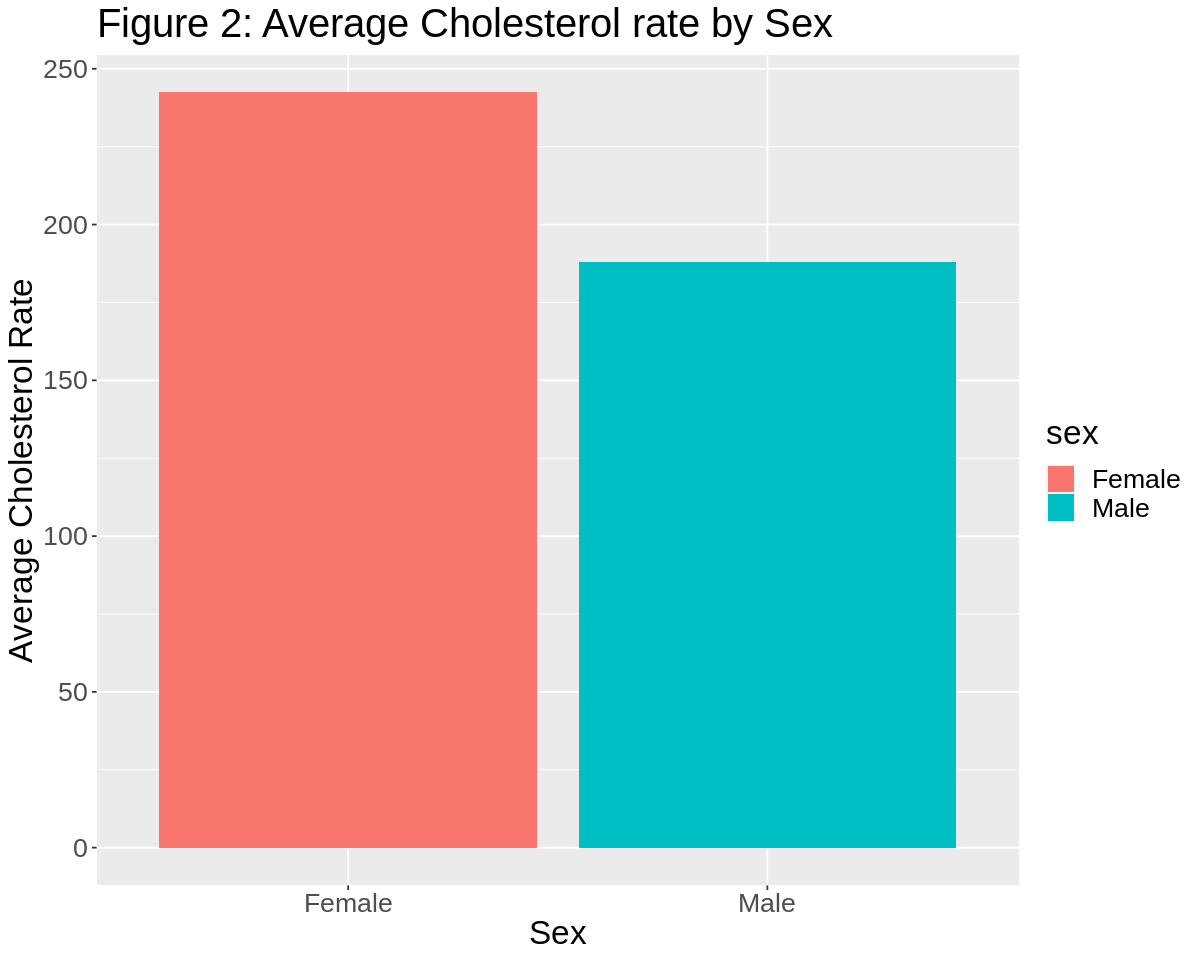

In [153]:
# Method_2

# Sex vs Chol rate
sex_chol <- heart_disease |>
    select(sex, chol)

# Sex vs Average Chol
sex_chol_avrg <- sex_chol |>
  group_by(sex) |>
  summarize(avg_chol = mean(chol))

# Plot of sex_chol_avrg
sex_chol_avrg_plot <- ggplot(sex_chol_avrg, aes(x = sex, y = avg_chol, fill = sex)) +
    geom_bar(size = 0.5, stat = "identity") +
    labs(x = "Sex", y = "Average Cholesterol Rate") + 
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 2: Average Cholesterol rate by Sex")
sex_chol_avrg_plot


`Figure 2` depicts the average cholesterol rates among males and females. From the graph, it is clear that the average cholesterol rate is higher in females than in males. Studies have shown that high cholesterol levels can lead to heart disease. Therefore, it can be concluded that females are more prone to heart diseases based on their cholesterol rates. Cholesterol rate is considered a major factor contributing to heart disease. Using average cholesterol rate as a predictor, we may be able to detect heart diseases at an early stage.

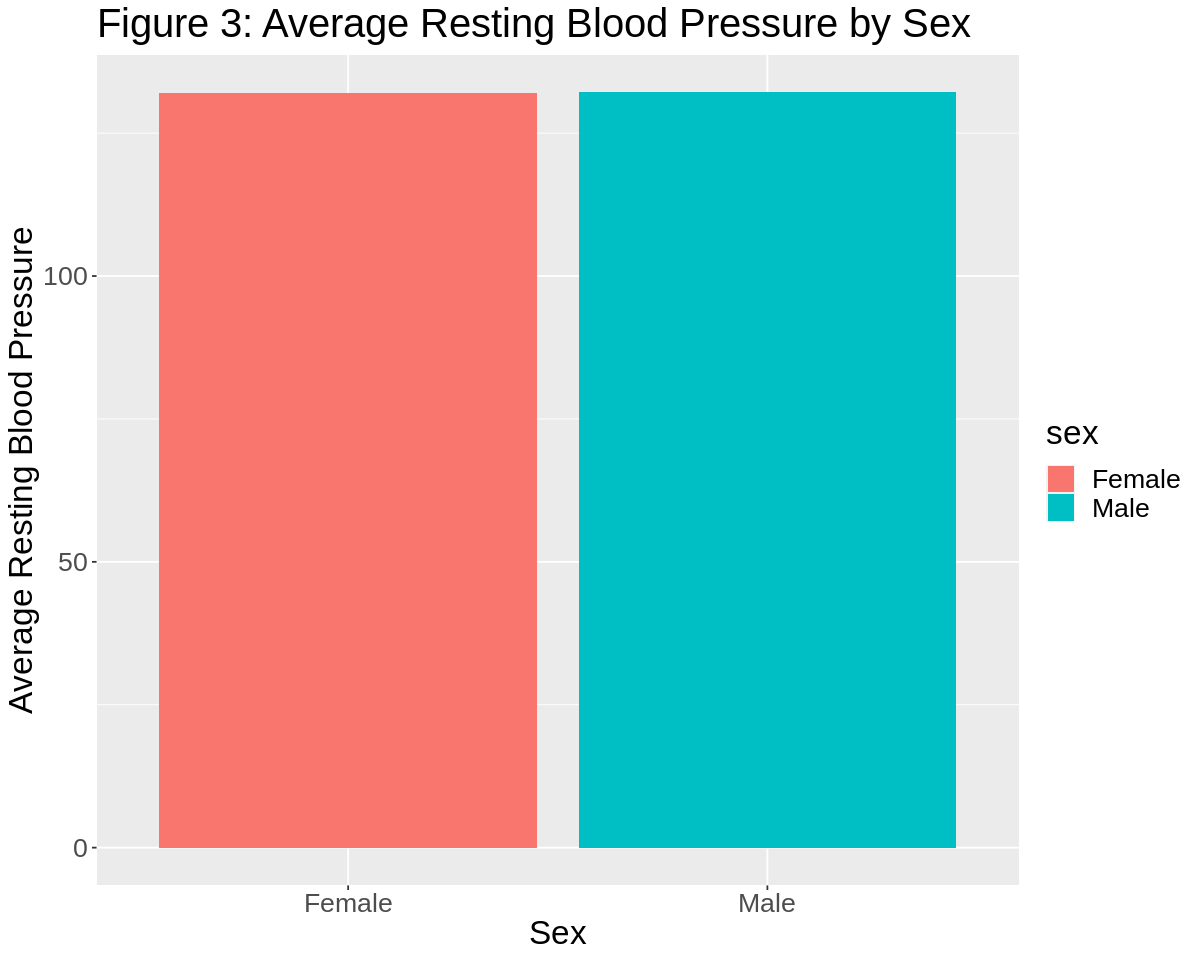

In [155]:
# Method_3

# Sex vs Resting Blood Pressure
sex_trestbps <- heart_disease |>
  select(sex, trestbps)

# Sex vs Average Resting Blood Pressure
sex_trestbps_avrg <- sex_trestbps |>
  group_by(sex) |>
  summarize(avg_trestbps = mean(trestbps, na.rm = TRUE))

# Plot of Sex vs Average Resting Blood Pressure
sex_trestbps_plot <- ggplot(sex_trestbps_avrg, aes(x = sex, y = avg_trestbps, fill = sex)) +
    geom_bar(size = 0.5, stat = "identity") +
    labs(x = "Sex", y = "Average Resting Blood Pressure") + 
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 3: Average Resting Blood Pressure by Sex")
sex_trestbps_plot


`Figure 3` depicts that popular resting electrocardiographic results are more in males than females. In this graph, there are two categories of popular resting electrocardiographic results, which is Iv hypertrophy and st-t abnormality. In both categories, it has been clearly seen that the count of males in these two is higher than females. In this case, we can say that males could be more prone to heart diseases than females.

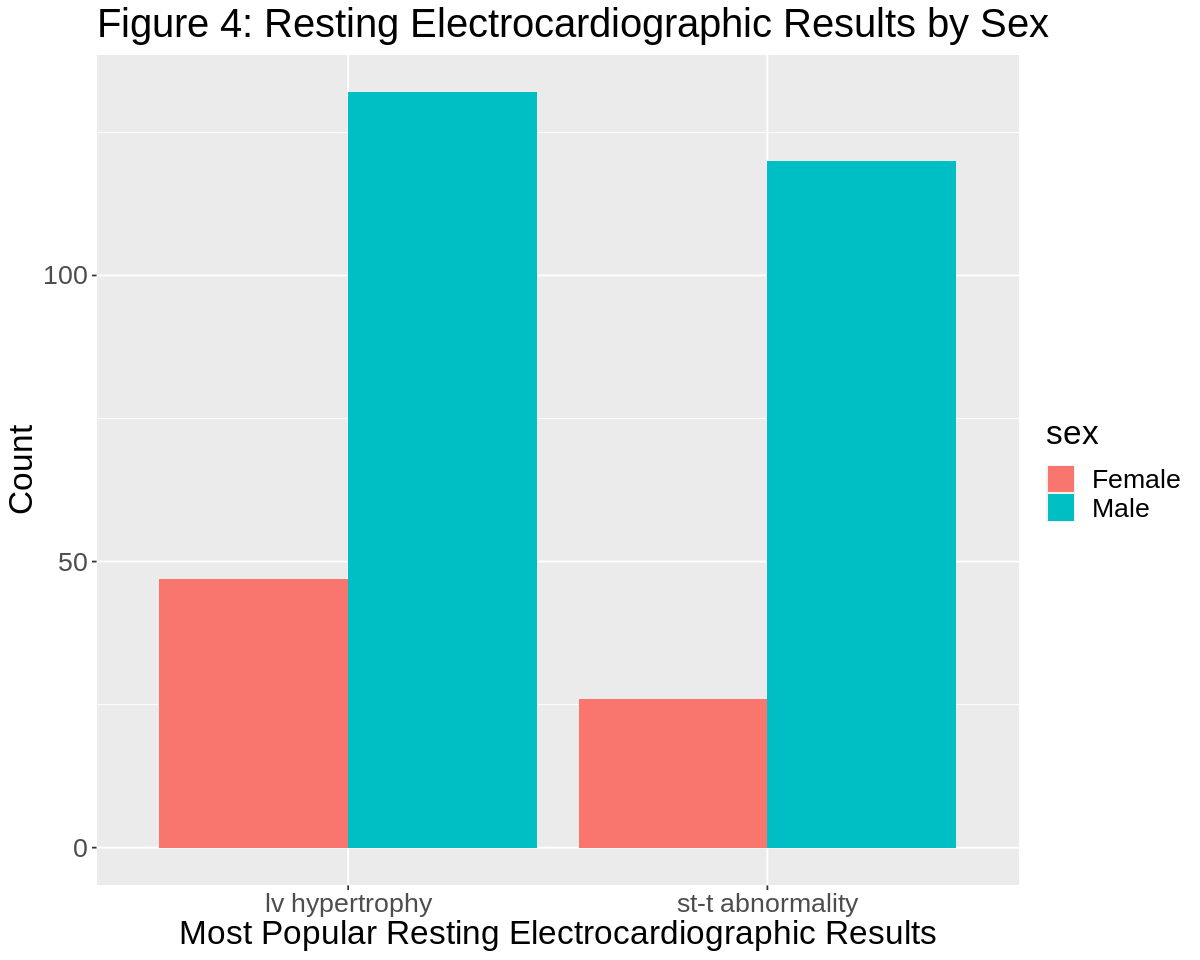

In [156]:
# Method_4

# Number of restecg
restecg_count <- heart_disease |>
 filter(restecg != "normal") |>
  group_by(sex, restecg) |>
  count()

# Plot of Sex vs Resting Electrocardiographic Results
restecg_count_plot <- ggplot(restecg_count, aes(x = restecg, y = n, fill = sex)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Most Popular Resting Electrocardiographic Results", y = "Count") + 
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 4: Resting Electrocardiographic Results by Sex")
restecg_count_plot

As can be seen from `Figure 4`, this graph depicts that females have a slightly more average resting blood pressure than males. Resting blood pressure is an important factor that can affect the risk of developing heart disease. Elevated blood pressure, especially over an extended period, can strain the heart and blood vessels, leading to various cardiovascular conditions. Thus, higher resting blood pressure can cause heart diseases and in this case, males and females are equally prone to heart diseases. However, in females, it is slightly higher, so females have a little more risk of heart disease.


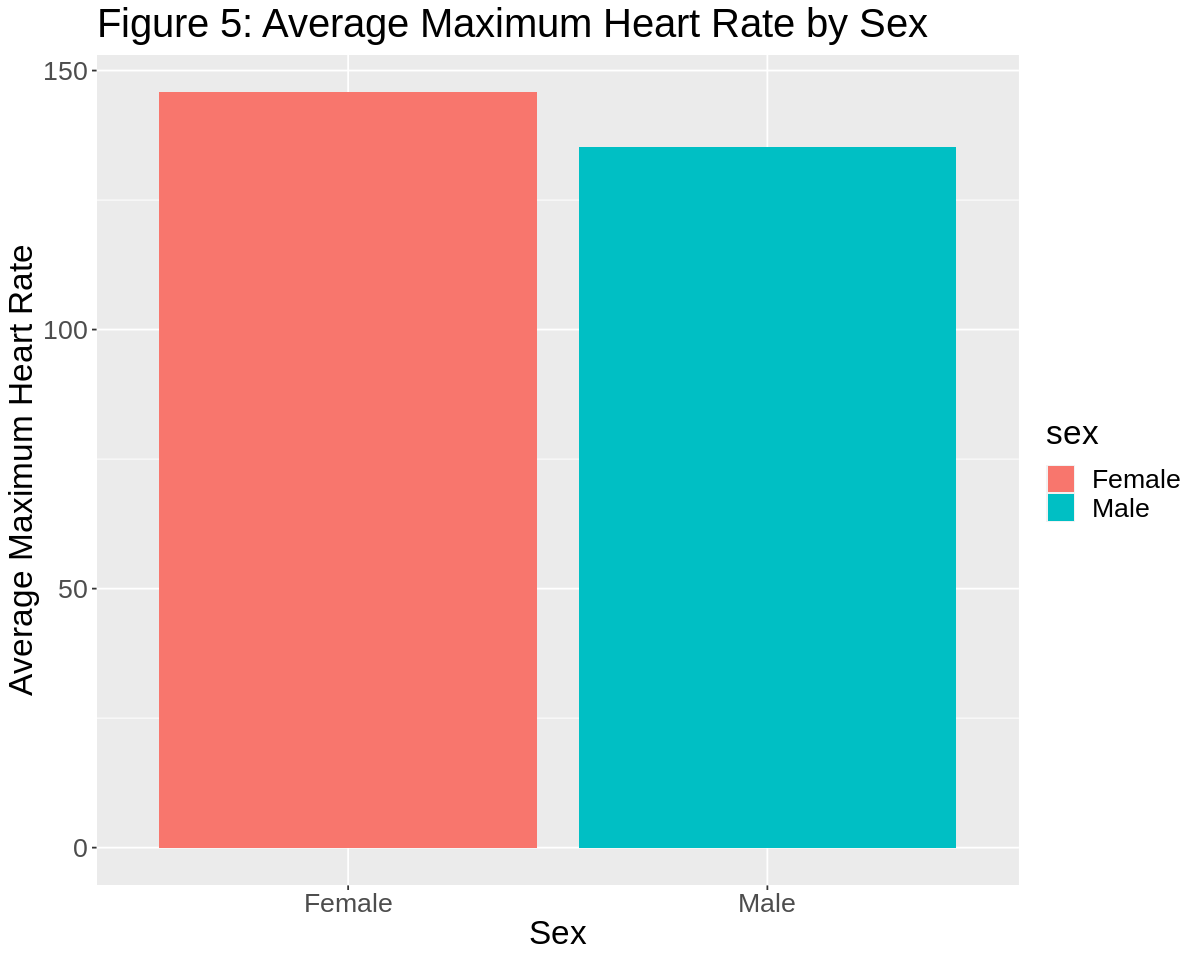

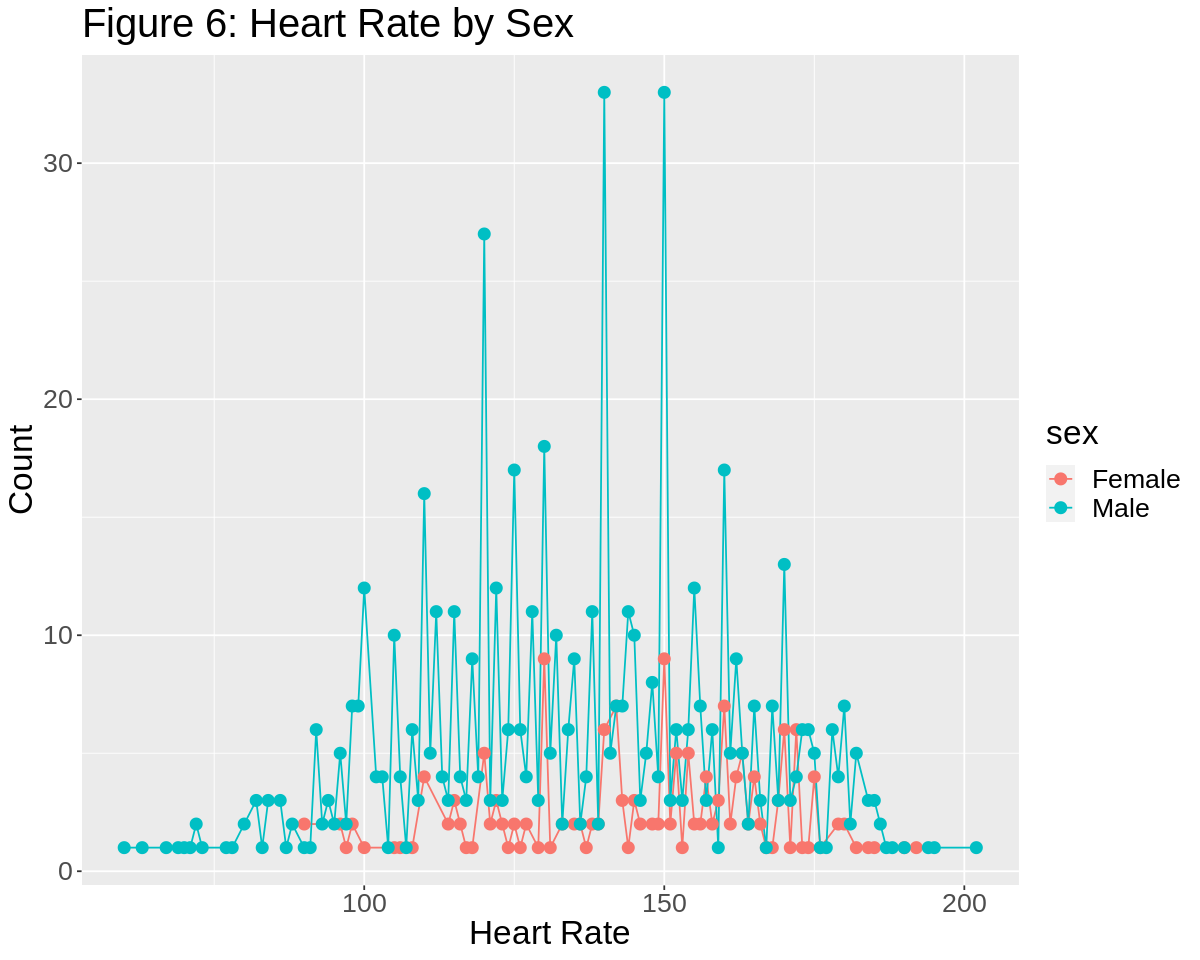

In [161]:
# Method_5

# Sex vs Average thalch
sex_thalch_avrg <- heart_disease |>
  group_by(sex) |>
  summarize(avg_thalch = mean(thalch))

# Plot of Sex vs Average thalch
sex_thalch_avrg_plot <- ggplot(sex_thalch_avrg, aes(x = sex, y = avg_thalch, fill = sex)) +
    geom_bar(stat = "identity") +
    labs(x = "Sex", y = "Average Maximum Heart Rate") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 5: Average Maximum Heart Rate by Sex")
sex_thalch_avrg_plot

# Sex vs Heart Rate
sex_heart_rate <- heart_disease |>
  group_by(sex, thalch) |>
  count()

# Plot of Sex vs Heart Rate
sex_heart_rate_plot <- ggplot(sex_heart_rate, aes(x = thalch, y = n, color = sex)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Heart Rate", y = "Count") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 6: Heart Rate by Sex")
sex_heart_rate_plot

`Figure 5` shows the trend of `heart rate` among males and females. The majority of males and females have heart rates between 100-150 as the count between 100 to 150 is more after a 150 heart rate the count starts to decrease.

`Figure 6` shows that the average maximum heart rateis more in females than males. Studies show that if the heart rate is very high for a longer period of time then it could cause heart problem.

**Regression Model:**

After carefully selecting our variables, we will now focus on specifying our testing using the variables "thalch" and "trestbps":

* `Resting Blood Pressure (trestbps)`: Resting blood pressure is a crucial factor to consider in our analysis. High blood pressure is widely recognized as a significant risk factor for heart disease. By including this variable in our model, we can account for the impact of resting blood pressure on predicting cholesterol levels and evaluating the likelihood of heart disease. Understanding how resting blood pressure relates to cholesterol levels allows us to better assess the risk and potential heart conditions in individuals.

* `Maximum Heart Rate Achieved (thalch)`: Another important variable we are incorporating is the maximum heart rate achieved during exercise, represented by thalch. Research has demonstrated that the maximum heart rate achieved is linked to cardiovascular health and can serve as an indicator of an individual's fitness level. By including this variable in our analysis, we can capture the relationship between maximum heart rate and cholesterol levels. This valuable information enhances our ability to predict the risk of heart disease and gain insights into an individual's cardiovascular well-being.

The selection of trestbps (resting blood pressure) and thalch (maximum heart rate achieved) as our variables is driven by their significance in understanding heart health. These variables provide valuable insights into predicting cholesterol levels and evaluating the risk of heart disease. By considering crucial factors like resting blood pressure and maximum heart rate, our analysis becomes more comprehensive and enables us to make more precise predictions about heart conditions. Incorporating these variables allows us to gain a better understanding of the relationship between cardiovascular health and cholesterol levels, ultimately leading to improved risk assessment for heart disease among individuals of different genders.



In [164]:
set.seed(123)

heart_split <- initial_split(heart_disease, prop = 0.75, strata = chol)
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

heart_recipe <- recipe(chol ~ trestbps + thalch, data = heart_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

heart_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

heart_vfold <- vfold_cv(heart_train, v = 15, strata = chol)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 3))

heart_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(heart_spec) |>
  tune_grid(resamples = heart_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse") |>
  select(neighbors, mean) |>
  arrange(mean, .by_group = TRUE) 

head(heart_results)


neighbors,mean
<dbl>,<dbl>
100,104.3638
94,104.3748
97,104.4234
91,104.5059
88,104.5763
73,104.5940


The values indicate the mean RMSE for different configurations, sorted in ascending order. The first row corresponds to k=100 neighbors, resulting in a mean RMSE of 104.3638.

**Process of analysis:**

First, the specific_data is split into two subsets: the training dataset and the testing dataset. The training dataset, which accounts for 75% of the original data, is used to train the model, while the testing dataset is set aside for evaluating how well the trained model performs. The split is performed using a function called `initial_split`, ensuring that both subsets have a fair representation of different cholesterol levels.

Next, a recipe called `heart_recipe` is created using the recipe function. This recipe defines the relationship between the target variable `chol` and the predictor variables `trestbps` and `thalch` in the regression model. To prepare the data for modeling, the predictor variables are standardized using the `step_scale` function, which makes sure they are on a comparable scale, and centered around their means using the `step_center` function. These preprocessing steps help improve the model's performance and make the results easier to interpret.

Moving on to the model itself, `heart_spec specifies` a nearest neighbor regression model. It uses the "rectangular" weight function, which means all neighbors have equal influence on the predictions. The `tune()` function is employed to determine the optimal number of neighbors during the model training process. The `set_engine` function sets the model engine as "kknn" (k-nearest neighbors), and the set_mode function specifies that we are performing regression since we are predicting a continuous target variable (chol).

For evaluating the model's performance, the `vfold_cv` function is used to perform cross-validation on the training dataset. This technique divides the data into 15 folds while maintaining the stratification based on cholesterol levels. Cross-validation allows us to repeatedly train and evaluate the model on different subsets of the data, providing a more reliable assessment of its predictive capabilities.

To streamline the workflow, the `heart_wkflw workflow` is created by combining the `heart_recipe` (data preprocessing) and `heart_spec` (model specification). This unified pipeline allows for smooth execution of the preprocessing steps and model training, making the analysis more organized and efficient.

Lastly, the `heart_results` tibble contains the results of model tuning. Specifically, it includes the `mean root mean squared error` (RMSE) values for different numbers of neighbors. By applying the filter function, we can identify the row(s) where the mean RMSE is at its minimum. This helps us pinpoint the configuration with the lowest mean RMSE, indicating the potentially best performing model in terms of prediction accuracy.

**Based on the provided result:**

The optimal number of neighbors for the nearest neighbor model is 100.
The mean RMSE value obtained is 104.3638, indicating the average prediction error for the model.

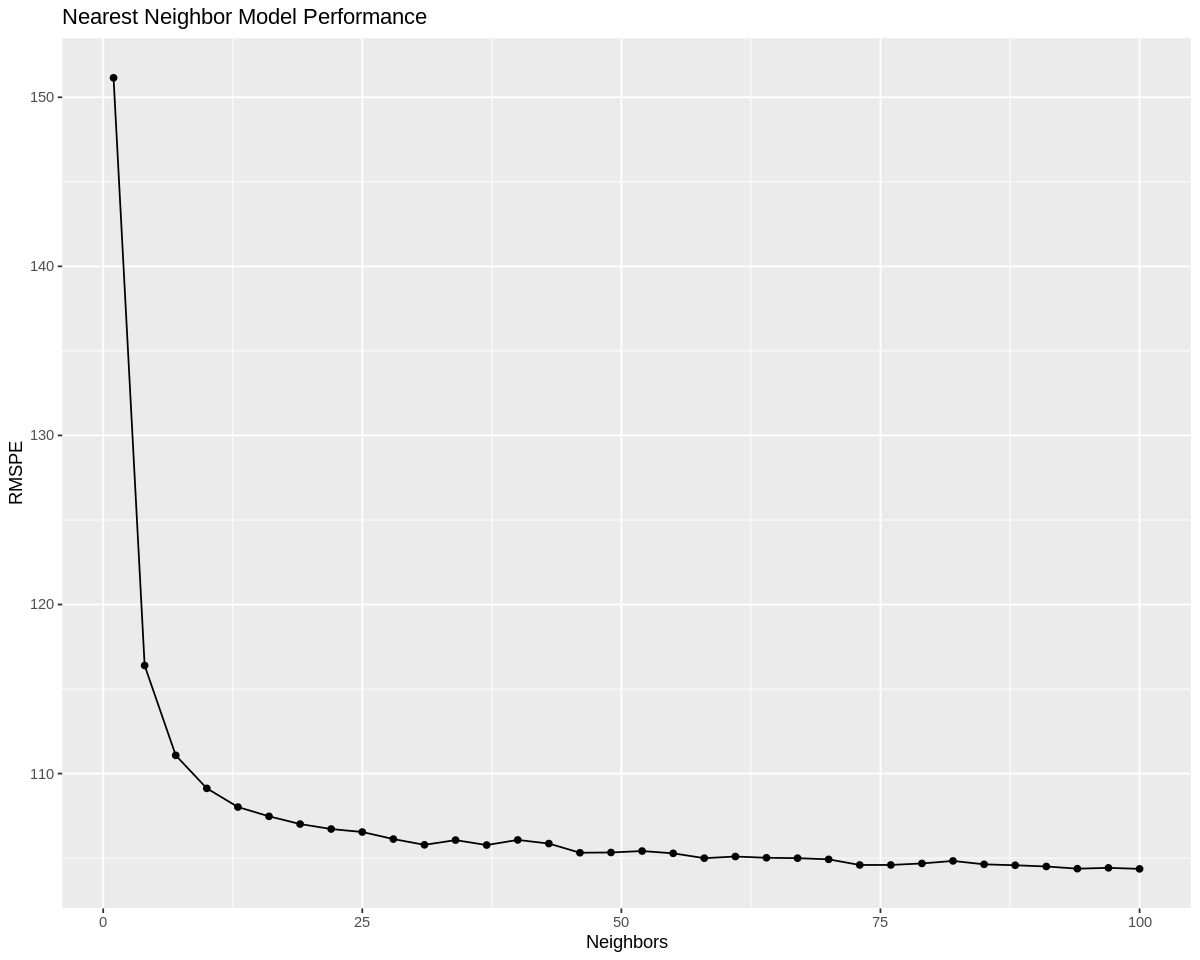

In [165]:
plot <- ggplot(heart_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "RMSPE") +
  ggtitle("Nearest Neighbor Model Performance")

print(plot)

The graph visualizes the relationship between the number of neighbors and the mean RMSE values, providing a clearer understanding of the model's performance across different configurations. The scatter plot or line plot showcases the trend of how increasing or decreasing the number of neighbors affects the prediction error. It enables us to identify the configuration with the lowest mean RMSE value, aiding in model selection and further optimization.



### DISCUSSION

In conclusion, when considering specific aspects of heart disease, there are some differences between males and females. Asymptomatic chest pain is reported more frequently in males than females, while atypical angina and non-anginal chest pain is reported more frequently in females. On average, females tend to have slightly higher cholesterol levels as well as resting blood pressure. Resting electrocardiographic results, which assess the electrical activity of the heart, showed that more males had problems with ST-T wave abnormality and left ventricular hypertrophy. Additionally, average maximum heart rate tends to be higher in females compared to males. These variations highlight the importance of considering gender-specific factors in the diagnosis, treatment, and management of heart disease. Some studies also show that young males are affected more than females but females after 45 years have a high risk of getting heart diseases. So, both gender have the risk of getting heart diseases and in our data analysis, the important predictors predict that females are more prone to heart disease than males.

We expected to find some differences between sexes as well as positive correlations between cholesterol, age, resting blood pressure, resting electrocardiographic results and heart disease (chest pain). We also expected to find a negative correlation between maximum heart rate achieved and heart disease as a maximum heart rate acheived indicates good health and is often something that decreases with age. We know that on average, females have a longer life expectancy than males, so females outperforming males on the important predictors of heart disease was what we were intuitively expecting to find.

Findings from our project show the relationship between certain factors and heart disease, as well as any gender differences. These findings can be used to take precautionary measures for one to score better on certain heart disease (chest pain) predictors, which may in turn reduce the risk of getting heart disease (chest pain).

This could lead to future questions regarding lifestyle choices and environmental factors which are responsible for contributing to heart disease. Questions can be asked about how one could reduce the factors impact on the probability of getting heart disease and to what extent you can prevent heart disease through lifestyle choices. Since we determined the important predictors to be max heart rate and resting blood pressure, we can focus on asking questions about how one can improve their metrics. This could also lead to the exploration of the famous question “nature vs nurture”, which in this context refers to the extent genetics vs environment impacts the likelihood of getting heart disease.

### REFERENCES

* Bots, Sophie H, et al. “Sex Differences in Coronary Heart Disease and Stroke Mortality: A Global Assessment of the Effect of Ageing between 1980 and 2010.” BMJ Global Health, 1 Mar. 2017, gh.bmj.com/content/2/2/e000298.

* “High Blood Pressure.” Heart and Stroke Foundation of Canada, www.heartandstroke.ca/heart-disease/risk-and-prevention/condition-risk-factors/high-blood-pressure#:~:text=High%20blood%20pressure%20is%20the,blood%20through%20the%20blood%20vessels. Accessed 22 June 2023.

* Kaolawanich, Yodying, et al. “Clinical Values of Resting Electrocardiography in Patients with Known or Suspected Chronic Coronary Artery Disease: A Stress Perfusion Cardiac MRI Study - BMC Cardiovascular Disorders.” BioMed Central, 28 Dec. 2021, bmccardiovascdisord.biomedcentral.com/articles/10.1186/s12872-021-02440-5#:~:text=Resting%20ECG%20abnormality%20has%20been,populations%20%5B10%2C%2011%5D. “Know Your Risk for Heart Disease.” Centers for Disease Control and Prevention, 21 Mar. 2023, www.cdc.gov/heartdisease/risk_factors.htm.

* Mayo Clinic. “High Cholesterol.” Mayo Clinic, 11 Jan. 2023, www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=With%20high%20cholesterol%2C%20you%20can,a%20heart%20attack%20or%20stroke.

* Perret-Guillaume, Christine et al. “Heart rate as a risk factor for cardiovascular disease.” Progress in cardiovascular diseases vol. 52,1 (2009): 6-10. doi:10.1016/j.pcad.2009.05.003

* Gender differences in coronary heart disease. (n.d.). Retrieved June 24, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3018605/